In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import json,numpy as np 
from skimage.io import *
from skimage import color,util as skimg_utils
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import SGDClassifier as SVC
from sklearn.metrics import confusion_matrix,f1_score
import matplotlib.pyplot as plt
import pickle,random,utils

In [2]:
dataset = json.load(open("./data/set/dataset.json","r"))
y = np.array(dataset["labels"])
X = np.asarray(dataset["instances"])

In [3]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=74)
for train_index,test_index in sss.split(X,y):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]

In [4]:
#X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.26,random_state=42)#np.random.randint(65536))

In [5]:
y_angry = y_train == 0

In [6]:
predictor = Pipeline(steps=[
    ("pca", PCA(n_components=0.99)),
    ("scaler",StandardScaler()),
    ("svm",SVC())
    
])

In [7]:
predicts = cross_val_predict(predictor,X_train,y_angry,cv=10)

In [8]:
f1_score(y_angry,predicts)

0.21088601415670002

In [9]:
predict_score = cross_val_score(predictor,X_train,y_train,cv=10,scoring="accuracy")
print(predict_score)

[0.43454179 0.38519637 0.43828715 0.3697733  0.40755668 0.40927419
 0.40020161 0.39202825 0.40353535 0.4603335 ]


In [10]:
predictor.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=F...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [11]:
y_pred = predictor.predict(X_test)

[[  35    0  139  141  198   51  116]
 [   1    0   23   25   22    5   10]
 [  13    1  138  146  121   87  126]
 [   7    0   85 1130   66   36   65]
 [   9    1  125  122  193   39  173]
 [   8    0   72   70   70  267  102]
 [  12    0  201  159  199   37  314]]


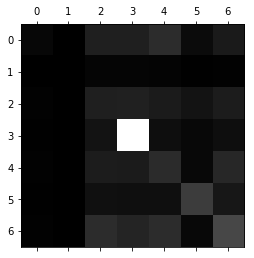

In [12]:
cfm = confusion_matrix(y_test,y_pred)
print(cfm)
plt.matshow(cfm,cmap=plt.cm.gray)

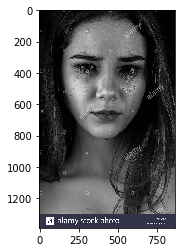

In [17]:
test_image = imread("./data/test_imgs/sadgirl.jpg")
plt.imshow(test_image,cmap=plt.cm.gray)
test_image = skimg_utils.img_as_ubyte(color.rgb2gray(test_image))

In [18]:
test_feature_vector = utils.turn_image_to_feature_vector(test_image)
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
predictor.predict([test_feature_vector])

array([6])

In [ ]:
pickle.dump(predictor,open("saved_model.mdl","wb"))